In [1]:
!pip install opendatasets

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishadisasanthika14
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 8.12MB/s]

In [4]:
data = pd.read_csv("random-linear-regression/test.csv")

# **Data Preprocessing**

In [5]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
data.shape

(300, 2)

In [7]:
x = data['x']
y = data['y']

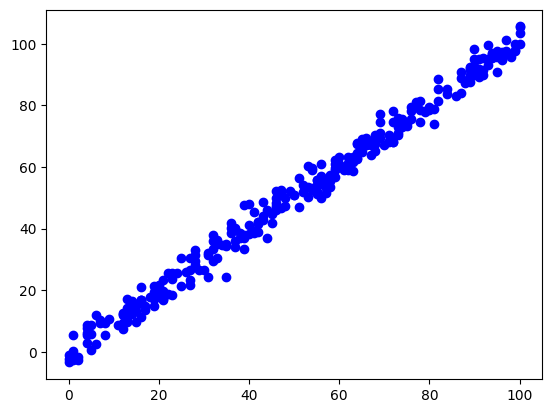

In [8]:
plt.scatter(x,y,c='b')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
x_train.shape, x_test.shape

((240,), (60,))

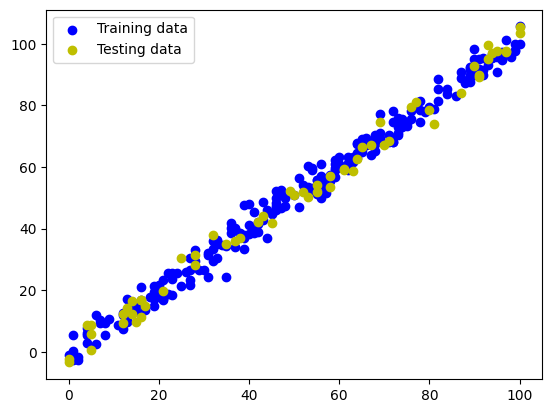

In [11]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

# **Model Building**

In [35]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
     tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number =10
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 34.8977 - mae: 34.8977
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6429 - mae: 9.6429 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7985 - mae: 5.7985 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8889 - mae: 3.8889 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4614 - mae: 3.4614 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3443 - mae: 3.3443 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6274 - mae: 2.6274 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6169 - mae: 2.6169 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6573 - mae: 2.6573 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3674 - mae: 2.3674 


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [37]:
y_pred = model.predict(x_test)
y_pred[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[90.19738  ],
       [76.15854  ],
       [94.20847  ],
       [ 4.9615054],
       [91.200165 ]], dtype=float32)

In [38]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


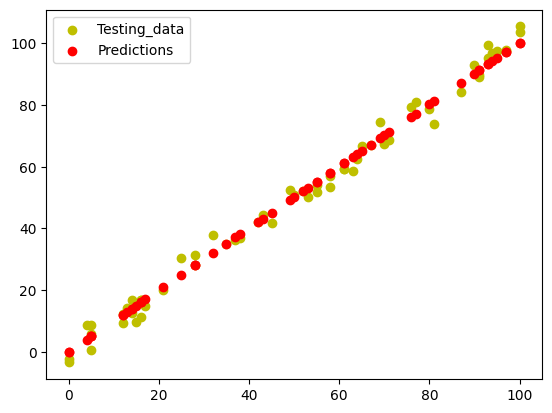

In [39]:

plt.scatter(x_test, y_test, c='y', label='Testing_data')
plt.scatter(x_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

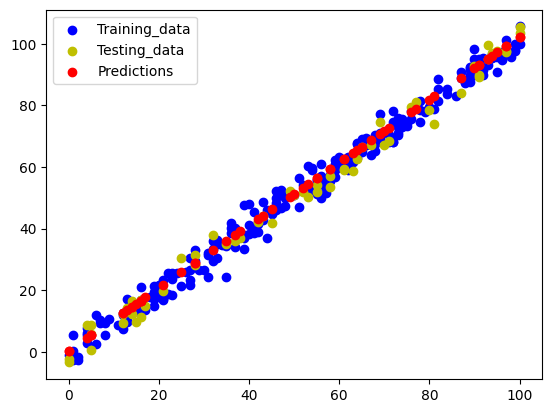

In [18]:
plt.scatter(x_train, y_train, c='b', label='Training_data')
plt.scatter(x_test, y_test, c='y', label='Testing_data')
plt.scatter(x_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

# **Evaluate Model**

In [19]:
# Using evaluate method
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6795 - mae: 2.6795 


[2.697800636291504, 2.697800636291504]

In [ ]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

In [ ]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

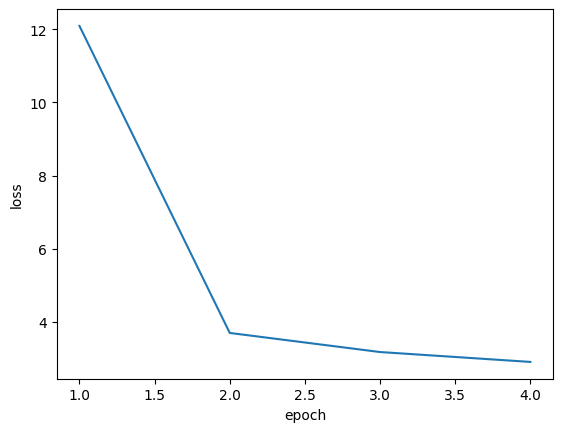

In [31]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()